## Problem Statement 4: 
Perform the following operations using Python on “Academic performance” dataset  
1.Scan all variables for missing values and inconsistencies. If there are missing values and/or  
inconsistencies, use any of the suitable techniques to deal with them.  
2. Apply data transformations on at least one of the variables. The purpose of this transformation 
should be one of the following reasons: to change the scale for better understanding of the variable, to 
convert a non-linear relation into a linear one, or to decrease the skewness and convert the 
distribution into a normal distribution. 
3. Identify the skewness using any technique and recover from skewness. 


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

In [2]:
df = pd.read_csv('xAPI-Edu-Data.csv')  # Replace with the path to your downloaded dataset

In [3]:
# 1. Scan for missing values and inconsistencies
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


In [4]:
# Check for negative values in numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if (df[col] < 0).any():
        print(f"Negative values found in column: {col}")

In [5]:
# Check original skewness
original_skewness = skew(df['VisITedResources'])
print(f"\nOriginal skewness of 'VisITedResources': {original_skewness:.2f}")


Original skewness of 'VisITedResources': -0.34


In [6]:
# Apply log transformation to reduce skewness
df['Log_VisITedResources'] = np.log1p(df['VisITedResources'])


In [7]:
# Check skewness after transformation
transformed_skewness = skew(df['Log_VisITedResources'])
print(f"Skewness after log transformation: {transformed_skewness:.2f}")

Skewness after log transformation: -1.33


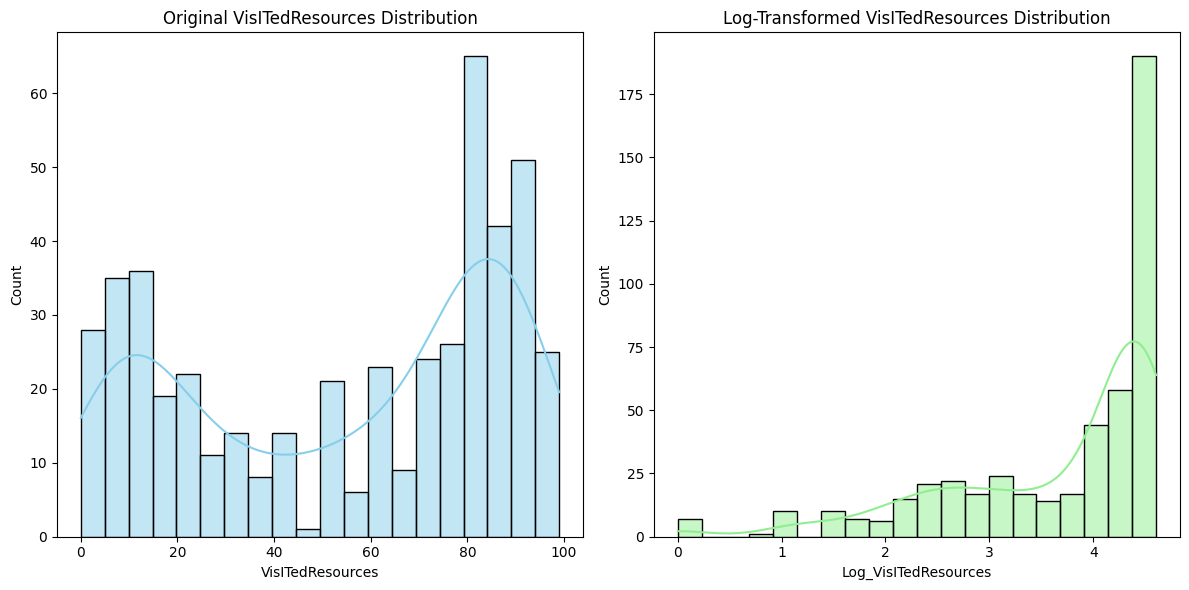

In [8]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['VisITedResources'], kde=True, bins=20, color='skyblue')
plt.title('Original VisITedResources Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Log_VisITedResources'], kde=True, bins=20, color='lightgreen')
plt.title('Log-Transformed VisITedResources Distribution')

plt.tight_layout()
plt.show()